# Data science in Python

## Session 2.2: Data visualisation with Matplotlib

- [Matplotlib](#Matplotlib)
- [Exercise 2.2.1](#Exercise-2.2.1)

## Matplotlib

[matplotlib](http://matplotlib.org/) is probably the single most used Python package for graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. It is also highly customizable, allowing you to create [rich visualizations](http://droettboom.com/jhepc2018-judge-packet/) of complex data.

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 

Let's start with a very simple plot. First we set the `%matplotlib inline` option, which tells the notebook to embed all plots as static images. Then we call the `.plot()` command on a list of integers to create the plot. Finally, we use the `.show()` method to render the plot and embed it underneath the code block.

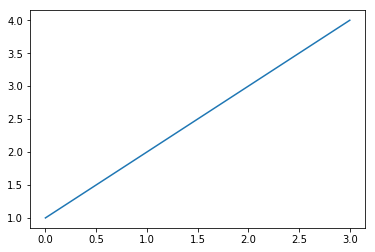

In [1]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
mpyplot.plot([1,2,3,4])
mpyplot.show()

After we create a plot, we can use the `.xlabel()` and `.ylabel()` commands to decorate it with axis legends, and add a title using the `.title()` command

In [ ]:
mpyplot.plot([1,2,3,4])
mpyplot.xlabel("X axis label")
mpyplot.ylabel("Y axis label")
mpyplot.title("Plot title")
mpyplot.show()

`plot()` is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

In [ ]:
mpyplot.plot([1,2,3,4], [1,4,9,16])

For every x, y pair of arguments, there is an **optional third argument** which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is `b-`, which is a solid blue line. For example, to plot the above with red circles, you would chose `ro`.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
mpyplot.plot([1,2,3,4], [1,4,9,16], 'ro')
mpyplot.axis([0, 6, 0, 20])
mpyplot.show()

These formatting options can be especially useful when displaying data from different sources on the same plot. Once the plot is created, additional lines can be added by calling the `.plot()` command on the same plot object, but specifying different options.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
mpyplot.plot(year, rainfall_Manchester, 'b-')
mpyplot.plot(year, rainfall_London, 'r--')
mpyplot.show()

With more than one dataset on the same plot, we often need to add a legend to the plot. This can be done by passing the `label` argument to the `.plot()` command, and then calling the `legend()` command on the plot.

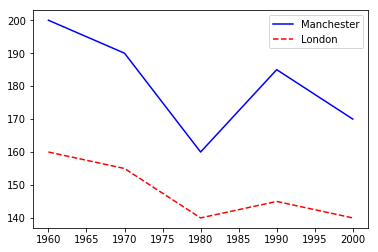

In [3]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
mpyplot.plot(year, rainfall_Manchester, 'b-', label = 'Manchester')
mpyplot.plot(year, rainfall_London, 'r--', label = 'London')
mpyplot.legend()
mpyplot.show()

Once we have made a plot, we can write it to disk using the `.savefig()` command. This will infer the file format from the ending of the file name e.g. "myplot.svg" will write in svg format, "myplot.pdf" will write in pdf format etc. **Note: the range of file types that can be written may vary between different operating systems.**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
mpyplot.plot([1,2,3,4], [1,4,9,16])
mpyplot.savefig("myplot.svg")

## Functions for specific plot types
`matplotlib` has a few functions in the **`pyplot` module** that make creating common types of plots faster and more convenient because they automatically create a Figure and an Axes object. The most widely used are:

- [mpyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) – creates a bar chart.
- [mpyplot.boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) – makes a box and whisker plot.
- [mpyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) – makes a histogram.
- [mpyplot.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) – creates a line plot.
- [mpyplot.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) – makes a scatter plot.

Calling any of these methods will automatically setup `Figure` and `Axes` objects, and draw the plot. Each of these methods has different parameters that can be passed in to modify the resulting plot. For example, let's plot a bar chart of the population size of different European capital cities:

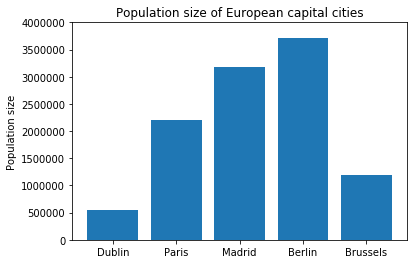

In [61]:
%matplotlib inline

import matplotlib.pyplot as mpyplot
city = ["Dublin", "Paris", "Madrid", "Berlin", "Brussels"]
population = [553165, 2206488, 3182981, 3711930, 1191604]
#mpyplot.bar(x = city, height = population)
#mpyplot.bar(range(1,len(city)+1), population)
mpyplot.bar(left=range(len(city)), height = population, tick_label=city)
mpyplot.ylim(0,4000000)
mpyplot.ylabel("Population size")
mpyplot.title("Population size of European capital cities")
mpyplot.show()

A full list of functions and details of how to use them is available from the [Pyplot API documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

## Plotting directly from `Pandas` objects

As seen in the previous session, it is possible to plot directly from Pandas. First, let's plot the GC content along a gene, using the state-based interface we have been using so far:

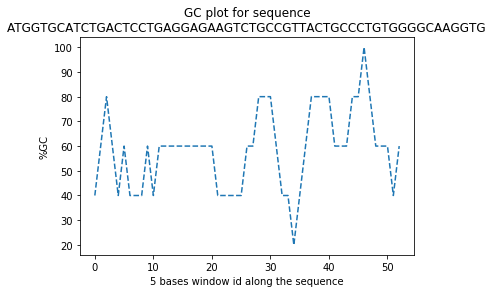

In [7]:
%matplotlib inline
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]
window_ids = range(len(gc))

import matplotlib.pyplot as mpyplot
mpyplot.plot(window_ids, gc, '--' )
mpyplot.xlabel('5 bases window id along the sequence')
mpyplot.ylabel('%GC')
mpyplot.title('GC plot for sequence\n' + seq)
mpyplot.show()

The `plot()` method on Pandas DataFrame is a wrapper around `matplotlib.pyplot.plot()`. We can therefore plot the same graph directly from a Pandas DataFrame:

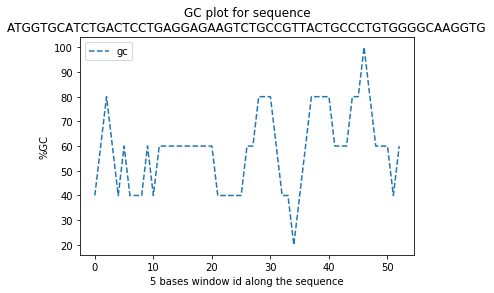

In [15]:
%matplotlib inline

import pandas
gc_df = pandas.DataFrame(gc, columns=['gc'])
gc_df.head()
thisplot = gc_df.plot(style='--')
#thisplot = gc_df.gc.plot(style='--')
#thisplot = gc_df['gc'].plot(style='--')
thisplot.set_xlabel('5 bases window id along the sequence')
thisplot.set_ylabel('%GC')
thisplot.set_title('GC plot for sequence\n' + seq)

**However**, it is important to appreciate the difference between using this method and the state-based interface. The state-based interface refers to the "current" plot, which is whatever is created from the most recent use of the `.plot()` command (as long as this isn't saved into a variable). In contrast, the Pandas example above creates a plot object first (`thisplot`), and the subsequent commands use an object-oriented interface to refer to this object specifically. This means that certain commands differ between the two. For example, to set the x-axis label you use the `.xlabel()` method for the state-based interface, but the `.set_xlabel()` method for the object-oriented interface.

## Exercise 2.2.1

Re-use the GapMinder dataset to plot, in Jupyter using Matplotlib, from the world data the life expectancy against GDP per capita for 1952, 1977 and 2007 using a scatter plot, add title to your graph as well as a legend.

Find the country with the highest GDP per Capita for 1952, 1977 and 2007.

Re-write the function `gdp_stats_by_continent_and_year()` using Pandas.

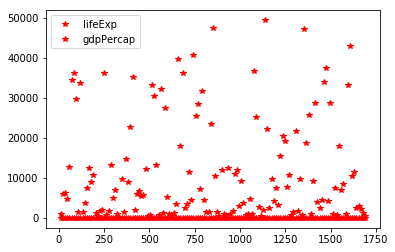

In [44]:
%matplotlib inline

import pandas as pd

data = pd.read_csv('data/gapminder.csv')
#data.head()

data_df = pd.DataFrame(data, columns=['year','lifeExp','gdpPercap'])
data_df.head()

thisplot = data_df[data_df['year']== 2007].drop(columns=['year']).sort_values('lifeExp',ascending=False).plot(style='*',c='r')



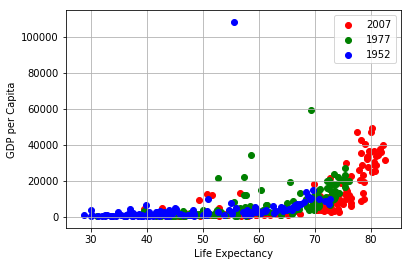

In [46]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as mpyplot

data = pd.read_csv('data/gapminder.csv')
#data.head()

data_df = pd.DataFrame(data, columns=['country','year','lifeExp','gdpPercap'])
#data_df.head()

data_year2007_df = data_df[data_df['year']== 2007]
data_year1977_df = data_df[data_df['year']== 1977]
data_year1952_df = data_df[data_df['year']== 1952]

# print the top 3 country with the highest GDP per Capita for 2007.
data_year_df.sort_values('gdpPercap',ascending=False).iloc[:3]

mpyplot.scatter(data_year2007_df['lifeExp'], data_year2007_df['gdpPercap'], c='r', label='2007')
mpyplot.scatter(data_year1977_df['lifeExp'], data_year1977_df['gdpPercap'], c='g', label='1977')
mpyplot.scatter(data_year1952_df['lifeExp'], data_year1952_df['gdpPercap'], c='b', label='1952')
mpyplot.xlabel('Life Expectancy')
mpyplot.ylabel('GDP per Capita')
mpyplot.legend()
mpyplot.grid(True)
mpyplot.show()


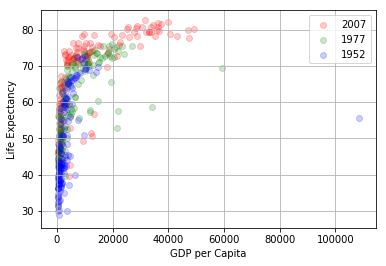

The country with highest GDP in 1952 is  Kuwait


In [56]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as mpyplot

data_df = pd.DataFrame(pd.read_csv('data/gapminder.csv'))
#data_df.head()

data_2007 = data_df[data_df['year']== 2007]
data_1977 = data_df[data_df['year']== 1977]
data_1952 = data_df[data_df['year']== 1952]


mpyplot.scatter(data_2007['gdpPercap'], data_2007['lifeExp'], c='r', alpha=0.2, label='2007')
mpyplot.scatter(data_1977['gdpPercap'], data_1977['lifeExp'], c='g', alpha=0.2, label='1977')
mpyplot.scatter(data_1952['gdpPercap'], data_1952['lifeExp'], c='b', alpha=0.2, label='1952')

mpyplot.xlabel('GDP per Capita')
mpyplot.ylabel('Life Expectancy')
mpyplot.legend()
mpyplot.grid(True)
mpyplot.show()


# print the top 3 country with the highest GDP per Capita for 2007.
#data_1952.sort_values('gdpPercap',ascending=False).iloc[:3]
highest_GDP_195 = data_1952.sort_values('gdpPercap',ascending=False).iloc[0]["country"]
print("The country with highest GDP in 1952 is ", highest_GDP_195)

## Next session

Go to our next notebook: [Session 2.3: Biological data with BioPython](23_python_data.ipynb)